In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [325]:
batch1 = pickle.load(open('C:/Users/Pravallika Gajul/Battery/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13'] 
del batch1['b1c22']

In [326]:
numBat1 = len(batch1.keys())
numBat1

41

In [327]:
batch2 = pickle.load(open('C:/Users/Pravallika Gajul/Battery/batch2.pkl','rb'))

In [328]:
batch2_keys = ['b2c7','b2c8','b2c9','b2c15','b2c16']
batch1_keys = ['b1c0','b1c1','b1c2','b1c3','b1c4']
add_len = [662,981,1060,208,482];

In [329]:
for i,bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life']=batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j=='cycle':
            batch1[bk]['summary'][j]=np.hstack((batch1[bk]['summary'][j],batch2[batch2_keys[i]]['summary'][j]+len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j]=np.hstack((batch1[bk]['summary'][j],batch2[batch2_keys[i]]['summary'][j]))
    last_cycle=len(batch1[bk]['cycles'].keys())
    for j,jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle+j)]= batch2[batch2_keys[i]]['cycles'][jk]

In [330]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [331]:
numBat2=len(batch2.keys())
numBat2

43

In [340]:
batch3 = pickle.load(open('C:/Users/Pravallika Gajul/Battery/batch3.pkl','rb'))

In [341]:
batch3.keys()

dict_keys(['b3c0', 'b3c1', 'b3c2', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c23', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30', 'b3c31', 'b3c32', 'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c37', 'b3c38', 'b3c39', 'b3c40', 'b3c41', 'b3c42', 'b3c43', 'b3c44', 'b3c45'])

In [342]:
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [343]:
numBat3=len(batch3.keys())
numBat3

40

In [344]:
numBat=numBat1+numBat2+numBat3
numBat

124

In [345]:
bat_dict={**batch1,**batch2,**batch3}

(0.8, 1.15)

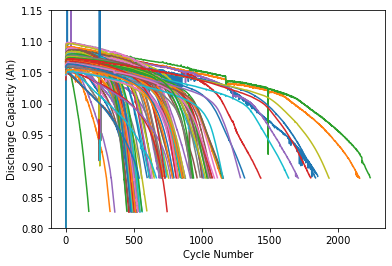

In [346]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
a, b = 0.8, 1.15
plt.ylim((a, b)) #Where a, b represent the bottom and top limits for your plot

#Another notation
plt.ylim(bottom=a)
plt.ylim(top=b)

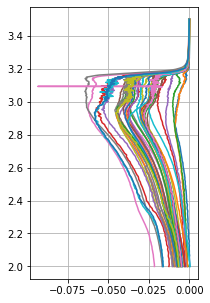

In [347]:
v_space = np.linspace(3.5,2,1000)
plt.figure(figsize=(3,5))
for cell in batch1.values():
    c10 = cell['cycles']['10']
    c100 = cell['cycles']['100']
    dQ_100_10 = c100['Qdlin'] - c10['Qdlin']
    plt.plot(dQ_100_10, v_space)
plt.grid()
plt.show()

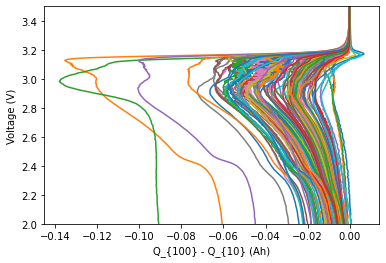

In [348]:
Vdlin=np.linspace(3.5,2,1000)
for i in bat_dict.keys():
    plt.plot((bat_dict[i]['cycles']['99']['Qdlin']- bat_dict[i]['cycles']['9']['Qdlin']), Vdlin)

plt.ylabel('Voltage (V)')
plt.xlabel('Q_{100} - Q_{10} (Ah)')
a, b = 2,3.5
plt.ylim((a, b)) #Where a, b represent the bottom and top limits for your plot
#Another notation
plt.ylim(bottom=a)
plt.ylim(top=b)
plt.show()


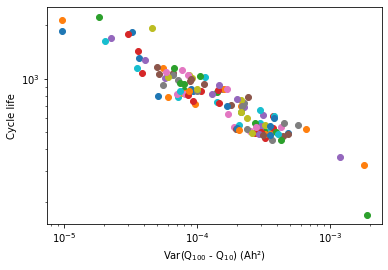

In [349]:
trainDataSize = len(bat_dict)
cycleLife = {}
DeltaQ_var = {}

for i in bat_dict.keys():
    cycleLength = len(bat_dict[i]['cycles'])
    deltaQ = bat_dict[i]['cycles']['99']['Qdlin'] - bat_dict[i]['cycles']['9']['Qdlin']
    deltaQ_var = np.var(deltaQ)
    cycleLife[i] = int(cycleLength) + 1
    DeltaQ_var[i] = deltaQ_var

plt.figure()
for i in bat_dict.keys():
    plt.loglog(DeltaQ_var[i], cycleLife[i], marker="o")
plt.ylabel('Cycle life')
plt.xlabel('Var(Q$_{100}$ - Q$_{10}$) (Ah²)')
plt.show()

In [350]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

In [351]:
trainData={**batch1}

In [352]:
testData={**batch2}

In [353]:
valData={**batch3}

In [354]:
def helperGetFeatures(batch):
    N = len(batch)  # Number of batteries
    
    # Preallocation of variables
    y = {}
    DeltaQ_var = {}
    DeltaQ_min = {}
    CapFadeCycle2Slope = {}
    CapFadeCycle2Intercept = {}
    Qd2 = {}
    AvgChargeTime = {}
    IntegralTemp = {}
    MinIR = {}
    IRDiff2And100 = {}
    
    for i in batch.keys():
        # cycle life
        y[i] = len(batch[i]['cycles']) + 1
        
        # Identify cycles with time gaps
        timeGapCycleIdx = []
        for jCycle in batch[i]['cycles'].keys():
            dt = np.diff(batch[i]['cycles'][jCycle]['t'])
            if np.max(dt) > 5 * np.mean(dt):
                timeGapCycleIdx.append(jCycle)
        
        
        
        # Remove cycles with time gaps
        #for idx in sorted(timeGapCycleIdx, reverse=True):
            #del batch[i]['cycles'][idx]
            #del batch[i]['summary']['QD'][idx]
            #del batch[i]['summary']['IR'][idx]
            #del batch[i]['summary']['chargetime'][idx]
        
        # compute Q_100_10 stats
        DeltaQ = batch[i]['cycles']['99']['Qdlin'] - batch[i]['cycles']['9']['Qdlin']
        #DeltaQ_var[i] = np.log10(np.abs(np.var(bat_dict[i]['cycles']['99']['Qdlin']-bat_dict[i]['cycles']['9']['Qdlin'])))
        DeltaQ_var[i] = np.log10(np.abs(np.var(DeltaQ)))
        DeltaQ_min[i] = np.log10(np.abs(np.min(DeltaQ)))
        
        # Slope and intercept of linear fit for capacity fade curve from cycle 2 to cycle 100
        coeff2 = np.polyfit(batch[i]['summary']['cycle'][1:99], batch[i]['summary']['QD'][1:99], 1)
        CapFadeCycle2Slope[i] = coeff2[0]
        CapFadeCycle2Intercept[i] = coeff2[1]
        
        # Discharge capacity at cycle 2
        Qd2[i] = batch[i]['summary']['QD'][1]
        
        # Avg charge time, first 5 cycles (2 to 6)
        AvgChargeTime[i] = np.mean(batch[i]['summary']['chargetime'][1:5])
        
        # Integral of temperature from cycles 2 to 100
        tempIntT = 0
        for jCycle in batch[i]['cycles'].keys():
            tempIntT += np.trapz(batch[i]['cycles'][jCycle]['t'], batch[i]['cycles'][jCycle]['T'])
        IntegralTemp[i] = tempIntT
        
        # Minimum internal resistance, cycles 2 to 100
        temp = np.array(batch[i]['summary']['IR'][1:99])
        MinIR[i] = np.min(temp[temp != 0])
        IRDiff2And100[i] = batch[i]['summary']['IR'][99] - batch[i]['summary']['IR'][1]
    
    xTable = pd.DataFrame({
        'DeltaQ_var': DeltaQ_var,
        'DeltaQ_min': DeltaQ_min,
        'CapFadeCycle2Slope': CapFadeCycle2Slope,
        'CapFadeCycle2Intercept': CapFadeCycle2Intercept,
        'Qd2': Qd2,
        'AvgChargeTime': AvgChargeTime,
        'MinIR': MinIR,
        'IRDiff2And100': IRDiff2And100
    })
    
    return xTable, y


In [355]:
# Call helperGetFeatures function
XTrain, yTrain = helperGetFeatures(trainData)

In [356]:
# Call helperGetFeatures function
XVal, yVal = helperGetFeatures(valData)

In [357]:

# Display the head of XTrain
XTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, b1c0 to b1c45
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DeltaQ_var              41 non-null     float64
 1   DeltaQ_min              41 non-null     float64
 2   CapFadeCycle2Slope      41 non-null     float64
 3   CapFadeCycle2Intercept  41 non-null     float64
 4   Qd2                     41 non-null     float64
 5   AvgChargeTime           41 non-null     float64
 6   MinIR                   41 non-null     float64
 7   IRDiff2And100           41 non-null     float64
dtypes: float64(8)
memory usage: 2.9+ KB


In [358]:
XVal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, b3c0 to b3c45
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DeltaQ_var              40 non-null     float64
 1   DeltaQ_min              40 non-null     float64
 2   CapFadeCycle2Slope      40 non-null     float64
 3   CapFadeCycle2Intercept  40 non-null     float64
 4   Qd2                     40 non-null     float64
 5   AvgChargeTime           40 non-null     float64
 6   MinIR                   40 non-null     float64
 7   IRDiff2And100           40 non-null     float64
dtypes: float64(8)
memory usage: 2.8+ KB


In [359]:
type(XTrain['DeltaQ_var'].values)

numpy.ndarray

In [360]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

alphaVec = np.arange(0.01, 1.01, 0.1)
lambdaVec = np.arange(0, 1.01, 0.01)
MCReps = 1
cvFold = 4

rmseList = np.zeros(len(alphaVec))
minLambdaMSE = np.zeros(len(alphaVec))
wModelList = []
betaVec = []

# Convert dictionary of feature arrays to a DataFrame
X_train_df = pd.DataFrame(XTrain)

# Convert dictionary of target values to an array
y_train_array = np.array(list(yTrain.values()))
for i, alpha in enumerate(alphaVec):
    lasso = LassoCV(alphas=lambdaVec, cv=KFold(n_splits=cvFold), random_state=42, normalize=True)
    lasso.fit(X_train_df, y_train_array)
    
    if len(lasso.alphas_) > 0:
        indexMinMSE = np.argmin(lasso.mse_path_.mean(axis=1))
        minLambdaMSE[i] = lasso.alphas_[indexMinMSE]
        rmseList[i] = np.sqrt(lasso.mse_path_.mean(axis=1)[indexMinMSE])
    else:
        # Handle the case when lasso.alphas_ is empty
        minLambdaMSE[i] = np.nan
        rmseList[i] = np.nan

    wModelList.append(lasso.coef_)
    
    # Populate betaVec with intercept values
    betaVec.append(lasso.intercept_)

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.24337721626216, tolerance: 57.26109666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.33756809429906, tolerance: 57.26109666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225.81917951456853, tolerance: 57.26109666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You 

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86660.12861095741, tolerance: 594.5423483870969
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140690.60818558745, tolerance: 617.4649935483869
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140690.60818558745, tolerance: 617.4649935483869
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94263.01240443159, tolerance: 565.1486967741936
  model = cd_fast.enet_

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.24337721626216, tolerance: 57.26109666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.33756809429906, tolerance: 57.26109666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225.81917951456853, tolerance: 57.26109666666667
  model = cd_fast.enet_coordinate_descent_gram(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You 

In [361]:
import numpy as np

num_val = 4
idx = np.argsort(rmseList)
val = rmseList[idx][:num_val]
index = idx[:num_val]

alpha = [alphaVec[i] for i in index]
lambda_val = [minLambdaMSE[i] for i in index]
w_model = [wModelList[i] for i in index]
beta = [betaVec[i] for i in index]


In [362]:
X_val_df = pd.DataFrame(XVal)
y_val_array = np.array(list(yVal.values()))

numVal = len(w_model)  # Assuming wModel and beta have been defined earlier
rmse_val_model = np.zeros(numVal)
for valList in range(numVal):
    y_pred_val = X_val_df @ w_model[valList] + beta[valList]
    rmse_val_model[valList] = np.sqrt(mean_squared_error(y_val_array, y_pred_val))

In [363]:
rmse_min_val = np.min(rmse_val_model)
idx = np.argmin(rmse_val_model)
w_model_final = w_model[idx]
beta_final = beta[idx]

PERFORMANCE

In [ ]:
XTest,yTest = helperGetFeatures(testData)

In [ ]:
XTest.info()

In [ ]:
y_pred_test = XTest.values.dot(w_model_final) + beta_final

In [ ]:
y_test = np.array(list(yTest.values()))

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_test)

# Plot the reference line y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

# Add labels and title
plt.title('Predicted vs Actual Cycle Life')
plt.xlabel('Actual cycle life')
plt.ylabel('Predicted cycle life')

# Display the plot
plt.show()

In [ ]:
errTest = y_pred_test - y_test
rmseTestModel = np.sqrt(np.mean(errTest**2))

print("RMSE on test data:", rmseTestModel)

In [ ]:
n = len(y_test)
nr = np.abs(y_test - y_pred_test)
errVal = (1/n) * np.sum(nr / y_test) * 100

print("Error percentage:", errVal)